In [5]:
import numpy as np
import tensorflow as tf 
import matplotlib.pylab  as plt 
import pandas as pd 
import warnings
from sklearn import datasets

## 샘플 생성

In [80]:
xy, labels = datasets.make_blobs(n_samples=500, center_box=(-1,1), centers=6, cluster_std = 0.1, random_state=1)
labels = labels % 2

In [81]:
labels

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

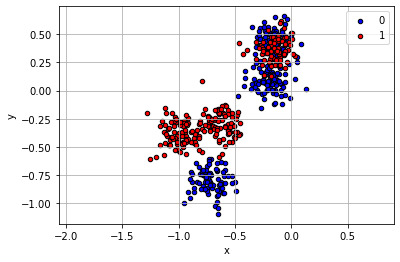

In [82]:
df = pd.DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels))
df
colors = {1:'red', 0:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
plt.axis('equal')
plt.grid()
plt.show()

In [83]:
features = np.array([[xval, yval] for xval, yval in xy])
labels = labels.reshape(-1,1)

In [84]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Dense(input_shape=(features.shape)),
    tf.keras.layers.Dense(10, activation='sigmoid', use_bias=True, input_shape=features.shape), # 출발
    tf.keras.layers.Dense(4, activation='sigmoid' , use_bias=True), # 중간 히든 레이어 
    tf.keras.layers.Dense(1, activation='sigmoid' , use_bias=True) # 원핫 인코드가 안되어 있으면 1개, 되어있으면 출력을 2개로 `
])

In [85]:
model.compile(
    loss='log_cosh',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'], # 평가
)

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 500, 10)           30        
_________________________________________________________________
dense_19 (Dense)             (None, 500, 4)            44        
_________________________________________________________________
dense_20 (Dense)             (None, 500, 1)            5         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(features, labels, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.1209 - accuracy: 0.5205 - val_loss: 0.1201 - val_accuracy: 0.5200
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1201 - accuracy: 0.5143 - val_loss: 0.1211 - val_accuracy: 0.4800
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.5091 - val_loss: 0.1206 - val_accuracy: 0.4800
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.5200 - val_loss: 0.1198 - val_accuracy: 0.6000
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.6586 - val_loss: 0.1196 - val_accuracy: 0.5900
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.7096 - val_loss: 0.1194 - val_accuracy: 0.6000
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1182 - accuracy: 0.6294 - val_loss: 0.1197 - val_accuracy: 0.4900
Epoch 8/100


13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.7623 - val_loss: 0.0810 - val_accuracy: 0.7300
Epoch 52/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.7849 - val_loss: 0.0797 - val_accuracy: 0.7600
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.7708 - val_loss: 0.0777 - val_accuracy: 0.7700
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.7636 - val_loss: 0.0789 - val_accuracy: 0.7500
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.7778 - val_loss: 0.0771 - val_accuracy: 0.7700
Epoch 56/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.7716 - val_loss: 0.0768 - val_accuracy: 0.7600
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.7568 - val_loss: 0.0770 - val_accuracy: 0.7600
Epoch 58/100
13/13 

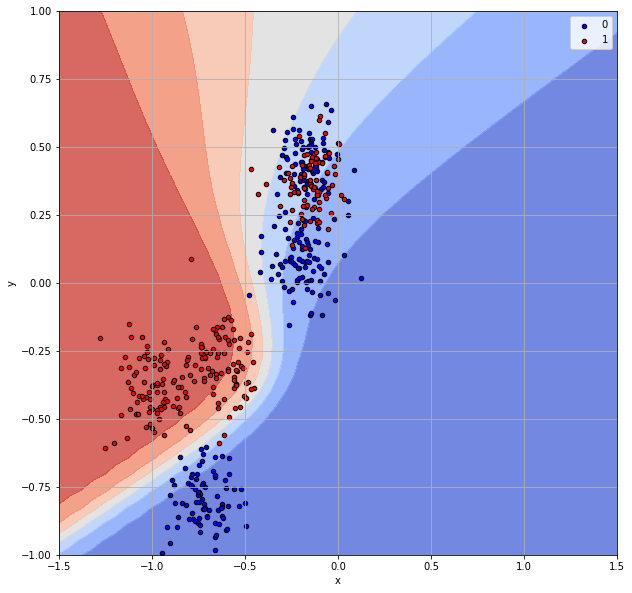

In [88]:
xx,yy = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
new_features = np.array([[xval, yval] for xval, yval in zip(xx.flatten(), yy.flatten())])

prediction = model.predict(new_features)
z = prediction.reshape(xx.shape)

df = pd.DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {1:'red', 0:'blue'}
_, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, z, cmap='coolwarm', alpha=0.8)

grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
ax.set_ylim([-1.0, 1.0])
plt.grid()
plt.legend()
plt.show()

# 함수로 만들기 

In [91]:
class CustomCallBack(tf.keras.callbacks.Callback):        

# 중간 중간 예측이 가능
    def on_epoch_end(self, epoch, logs=None):
        if not epoch % 1000: #학습을 n번했을때
            xx,yy = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
            new_features = np.array([[xval, yval] for xval, yval in zip(xx.flatten(), yy.flatten())])
            
            prediction = self.model.predict(new_features)
            prediction = prediction.reshape(-1,1)
            z = prediction.reshape(xx.shape)
            # 에포크가 끝날때마다 해당함수를 호출해줌 
            df = pd.DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
            colors = {1:'red', 0:'blue'}
            _, ax = plt.subplots(figsize=(10,10))
            ax.contourf(xx, yy, z, cmap='coolwarm', alpha=0.8)

            grouped = df.groupby('label')
            for key, group in grouped:
                group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
            ax.set_ylim([-1.0, 1.0])
            plt.grid()
            plt.title(epoch)
            plt.show()

Epoch 1/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.8650 - val_loss: 0.0412 - val_accuracy: 0.8900


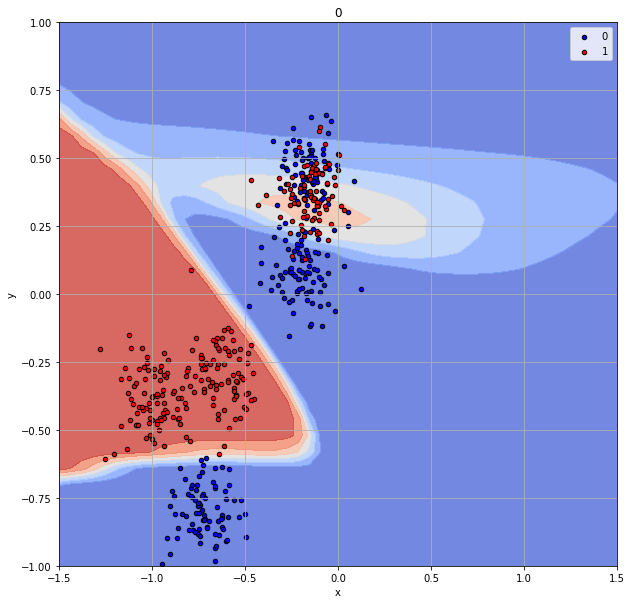

Epoch 2/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.0381 - accuracy: 0.8650 - val_loss: 0.0406 - val_accuracy: 0.8900
Epoch 3/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.8675 - val_loss: 0.0411 - val_accuracy: 0.9000
Epoch 4/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0383 - accuracy: 0.8675 - val_loss: 0.0405 - val_accuracy: 0.8800
Epoch 5/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.8650 - val_loss: 0.0418 - val_accuracy: 0.8900
Epoch 6/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.8625 - val_loss: 0.0421 - val_accuracy: 0.8800
Epoch 7/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.8550 - val_loss: 0.0415 - val_accuracy: 0.8900
Epoch 8/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.8675 - val_loss: 0.0412 - val_accuracy: 0.880

Epoch 59/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.8600 - val_loss: 0.0412 - val_accuracy: 0.9000
Epoch 60/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 0.8625 - val_loss: 0.0403 - val_accuracy: 0.8800
Epoch 61/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.8700 - val_loss: 0.0425 - val_accuracy: 0.8800
Epoch 62/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.8650 - val_loss: 0.0408 - val_accuracy: 0.8800
Epoch 63/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.8575 - val_loss: 0.0417 - val_accuracy: 0.8900
Epoch 64/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.8675 - val_loss: 0.0415 - val_accuracy: 0.8900
Epoch 65/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0387 - accuracy: 0.8725 - val_loss: 0.0412 - val_accuracy:

Epoch 116/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.8650 - val_loss: 0.0414 - val_accuracy: 0.8800
Epoch 117/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.8600 - val_loss: 0.0410 - val_accuracy: 0.8900
Epoch 118/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.8600 - val_loss: 0.0420 - val_accuracy: 0.8900
Epoch 119/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.8600 - val_loss: 0.0437 - val_accuracy: 0.8800
Epoch 120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.8725 - val_loss: 0.0395 - val_accuracy: 0.8800
Epoch 121/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.8775 - val_loss: 0.0409 - val_accuracy: 0.9000
Epoch 122/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.8650 - val_loss: 0.0408 - val_ac

13/13 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 0.8500 - val_loss: 0.0434 - val_accuracy: 0.8800
Epoch 173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.8650 - val_loss: 0.0404 - val_accuracy: 0.8800
Epoch 174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.8675 - val_loss: 0.0408 - val_accuracy: 0.8900
Epoch 175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.8575 - val_loss: 0.0442 - val_accuracy: 0.8800
Epoch 176/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.0382 - accuracy: 0.8600 - val_loss: 0.0405 - val_accuracy: 0.8800
Epoch 177/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.8675 - val_loss: 0.0410 - val_accuracy: 0.9000
Epoch 178/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0422 - val_accuracy: 0.8900


13/13 [==============================] - 0s 8ms/step - loss: 0.0377 - accuracy: 0.8675 - val_loss: 0.0415 - val_accuracy: 0.9000
Epoch 229/10000
13/13 [==============================] - 0s 10ms/step - loss: 0.0378 - accuracy: 0.8725 - val_loss: 0.0410 - val_accuracy: 0.8900
Epoch 230/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.8700 - val_loss: 0.0406 - val_accuracy: 0.8900
Epoch 231/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0380 - accuracy: 0.8625 - val_loss: 0.0423 - val_accuracy: 0.8900
Epoch 232/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0423 - val_accuracy: 0.8900
Epoch 233/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.8675 - val_loss: 0.0416 - val_accuracy: 0.8900
Epoch 234/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.8625 - val_loss: 0.0410 - val_accuracy: 0.9000


13/13 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.8650 - val_loss: 0.0422 - val_accuracy: 0.8900
Epoch 285/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.8675 - val_loss: 0.0416 - val_accuracy: 0.9000
Epoch 286/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.8675 - val_loss: 0.0418 - val_accuracy: 0.9000
Epoch 287/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.8675 - val_loss: 0.0410 - val_accuracy: 0.8900
Epoch 288/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.8625 - val_loss: 0.0428 - val_accuracy: 0.8800
Epoch 289/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.8700 - val_loss: 0.0410 - val_accuracy: 0.8800
Epoch 290/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0380 - accuracy: 0.8625 - val_loss: 0.0418 - val_accuracy: 0.9000
E

13/13 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.8650 - val_loss: 0.0414 - val_accuracy: 0.9000
Epoch 341/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.8675 - val_loss: 0.0408 - val_accuracy: 0.8900
Epoch 342/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0405 - val_accuracy: 0.8900
Epoch 343/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.8600 - val_loss: 0.0414 - val_accuracy: 0.9000
Epoch 344/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.8700 - val_loss: 0.0415 - val_accuracy: 0.9000
Epoch 345/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.8625 - val_loss: 0.0425 - val_accuracy: 0.8900
Epoch 346/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.8700 - val_loss: 0.0414 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.8600 - val_loss: 0.0413 - val_accuracy: 0.8900
Epoch 397/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0374 - accuracy: 0.8625 - val_loss: 0.0422 - val_accuracy: 0.9000
Epoch 398/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0416 - val_accuracy: 0.8900
Epoch 399/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0421 - val_accuracy: 0.9000
Epoch 400/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.8625 - val_loss: 0.0413 - val_accuracy: 0.9000
Epoch 401/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.8675 - val_loss: 0.0417 - val_accuracy: 0.8900
Epoch 402/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.8675 - val_loss: 0.0420 - val_accuracy: 0.9000
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.8625 - val_loss: 0.0420 - val_accuracy: 0.9000
Epoch 453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.8625 - val_loss: 0.0412 - val_accuracy: 0.8900
Epoch 454/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.8700 - val_loss: 0.0406 - val_accuracy: 0.8800
Epoch 455/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.8625 - val_loss: 0.0422 - val_accuracy: 0.9000
Epoch 456/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.8725 - val_loss: 0.0406 - val_accuracy: 0.8800
Epoch 457/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.8700 - val_loss: 0.0418 - val_accuracy: 0.9000
Epoch 458/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.8650 - val_loss: 0.0419 - val_accuracy: 0.9000
E

13/13 [==============================] - 0s 6ms/step - loss: 0.0371 - accuracy: 0.8675 - val_loss: 0.0415 - val_accuracy: 0.8900
Epoch 509/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.8625 - val_loss: 0.0412 - val_accuracy: 0.8900
Epoch 510/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.8700 - val_loss: 0.0421 - val_accuracy: 0.9000
Epoch 511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.8675 - val_loss: 0.0423 - val_accuracy: 0.9000
Epoch 512/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.8725 - val_loss: 0.0419 - val_accuracy: 0.9000
Epoch 513/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0415 - val_accuracy: 0.8900
Epoch 514/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.8675 - val_loss: 0.0417 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.8725 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 565/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.8700 - val_loss: 0.0412 - val_accuracy: 0.8900
Epoch 566/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0415 - val_accuracy: 0.9000
Epoch 567/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.8700 - val_loss: 0.0426 - val_accuracy: 0.9100
Epoch 568/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.8675 - val_loss: 0.0411 - val_accuracy: 0.9000
Epoch 569/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.8775 - val_loss: 0.0415 - val_accuracy: 0.9000
Epoch 570/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.8675 - val_loss: 0.0410 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.8750 - val_loss: 0.0412 - val_accuracy: 0.8900
Epoch 621/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.8575 - val_loss: 0.0430 - val_accuracy: 0.9100
Epoch 622/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.8675 - val_loss: 0.0419 - val_accuracy: 0.8900
Epoch 623/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.8650 - val_loss: 0.0429 - val_accuracy: 0.9100
Epoch 624/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0419 - val_accuracy: 0.8900
Epoch 625/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.8750 - val_loss: 0.0421 - val_accuracy: 0.8800
Epoch 626/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.8725 - val_loss: 0.0423 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.8750 - val_loss: 0.0411 - val_accuracy: 0.8900
Epoch 677/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0418 - val_accuracy: 0.8900
Epoch 678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.8700 - val_loss: 0.0415 - val_accuracy: 0.8900
Epoch 679/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.8650 - val_loss: 0.0426 - val_accuracy: 0.9000
Epoch 680/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0414 - val_accuracy: 0.8900
Epoch 681/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.8675 - val_loss: 0.0427 - val_accuracy: 0.9000
Epoch 682/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.8750 - val_loss: 0.0419 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.8725 - val_loss: 0.0430 - val_accuracy: 0.9000
Epoch 733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.8675 - val_loss: 0.0423 - val_accuracy: 0.8900
Epoch 734/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.8725 - val_loss: 0.0423 - val_accuracy: 0.9000
Epoch 735/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.8725 - val_loss: 0.0413 - val_accuracy: 0.8900
Epoch 736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.8650 - val_loss: 0.0426 - val_accuracy: 0.9000
Epoch 737/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.8750 - val_loss: 0.0419 - val_accuracy: 0.8900
Epoch 738/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.8725 - val_loss: 0.0420 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.8700 - val_loss: 0.0413 - val_accuracy: 0.8900
Epoch 789/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.8700 - val_loss: 0.0424 - val_accuracy: 0.9000
Epoch 790/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.8750 - val_loss: 0.0425 - val_accuracy: 0.9000
Epoch 791/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0374 - accuracy: 0.8700 - val_loss: 0.0419 - val_accuracy: 0.8800
Epoch 792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.8675 - val_loss: 0.0419 - val_accuracy: 0.9000
Epoch 793/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.8675 - val_loss: 0.0417 - val_accuracy: 0.9000
Epoch 794/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.8725 - val_loss: 0.0420 - val_accuracy: 0.9000
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8700 - val_loss: 0.0420 - val_accuracy: 0.8800
Epoch 845/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.8675 - val_loss: 0.0425 - val_accuracy: 0.9000
Epoch 846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0372 - accuracy: 0.8675 - val_loss: 0.0413 - val_accuracy: 0.8800
Epoch 847/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0365 - accuracy: 0.8700 - val_loss: 0.0427 - val_accuracy: 0.9000
Epoch 848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.8725 - val_loss: 0.0435 - val_accuracy: 0.9100
Epoch 849/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.8700 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 850/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8725 - val_loss: 0.0411 - val_accuracy: 0.8700
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.8800 - val_loss: 0.0424 - val_accuracy: 0.9000
Epoch 901/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0424 - val_accuracy: 0.9000
Epoch 902/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8800 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8775 - val_loss: 0.0425 - val_accuracy: 0.9000
Epoch 904/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.8675 - val_loss: 0.0420 - val_accuracy: 0.8800
Epoch 905/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8750 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 906/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8700 - val_loss: 0.0419 - val_accuracy: 0.8900
E

13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8775 - val_loss: 0.0429 - val_accuracy: 0.9000
Epoch 957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0420 - val_accuracy: 0.9000
Epoch 958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.8725 - val_loss: 0.0420 - val_accuracy: 0.9000
Epoch 959/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0423 - val_accuracy: 0.9000
Epoch 960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.0420 - val_accuracy: 0.8800
Epoch 961/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8725 - val_loss: 0.0424 - val_accuracy: 0.9000
Epoch 962/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.8725 - val_loss: 0.0421 - val_accuracy: 0.8900
E

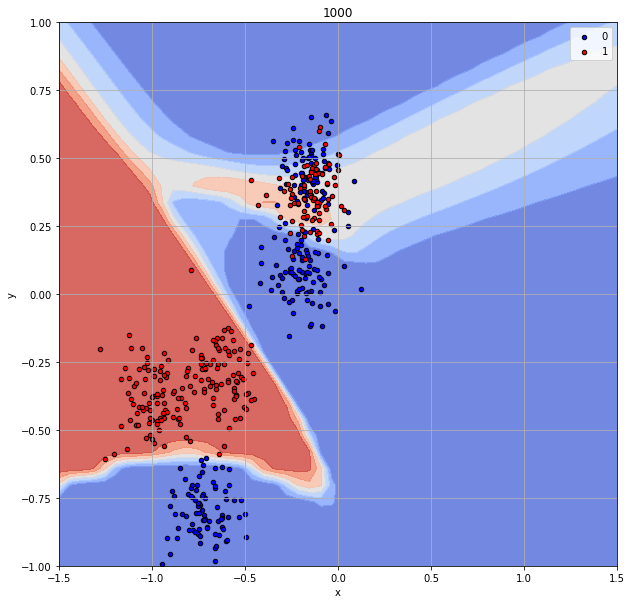

Epoch 1002/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.8750 - val_loss: 0.0433 - val_accuracy: 0.9000
Epoch 1003/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0425 - val_accuracy: 0.8800
Epoch 1004/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0424 - val_accuracy: 0.8800
Epoch 1005/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8775 - val_loss: 0.0429 - val_accuracy: 0.9000
Epoch 1006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.8750 - val_loss: 0.0420 - val_accuracy: 0.8900
Epoch 1007/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8725 - val_loss: 0.0422 - val_accuracy: 0.9100
Epoch 1008/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.8700 - val_loss: 0.0420 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.8675 - val_loss: 0.0427 - val_accuracy: 0.8900
Epoch 1059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8675 - val_loss: 0.0435 - val_accuracy: 0.9000
Epoch 1060/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8775 - val_loss: 0.0429 - val_accuracy: 0.9100
Epoch 1061/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0421 - val_accuracy: 0.9000
Epoch 1062/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8725 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 1063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.8700 - val_loss: 0.0421 - val_accuracy: 0.8900
Epoch 1064/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8750 - val_loss: 0.0428 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0427 - val_accuracy: 0.9100
Epoch 1115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.8750 - val_loss: 0.0427 - val_accuracy: 0.8900
Epoch 1116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0362 - accuracy: 0.8725 - val_loss: 0.0432 - val_accuracy: 0.9000
Epoch 1117/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.8750 - val_loss: 0.0427 - val_accuracy: 0.8900
Epoch 1118/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0427 - val_accuracy: 0.9100
Epoch 1119/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.8725 - val_loss: 0.0426 - val_accuracy: 0.8900
Epoch 1120/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.8725 - val_loss: 0.0431 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0357 - accuracy: 0.8725 - val_loss: 0.0425 - val_accuracy: 0.9100
Epoch 1171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.8750 - val_loss: 0.0433 - val_accuracy: 0.9100
Epoch 1172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.8825 - val_loss: 0.0425 - val_accuracy: 0.9000
Epoch 1173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0430 - val_accuracy: 0.9100
Epoch 1174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.8775 - val_loss: 0.0433 - val_accuracy: 0.9200
Epoch 1175/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0422 - val_accuracy: 0.9000
Epoch 1176/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0431 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0442 - val_accuracy: 0.9100
Epoch 1227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8800 - val_loss: 0.0431 - val_accuracy: 0.9000
Epoch 1228/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.8675 - val_loss: 0.0430 - val_accuracy: 0.9000
Epoch 1229/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8750 - val_loss: 0.0435 - val_accuracy: 0.9100
Epoch 1230/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0431 - val_accuracy: 0.9100
Epoch 1231/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8775 - val_loss: 0.0426 - val_accuracy: 0.9100
Epoch 1232/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0427 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 1283/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.8750 - val_loss: 0.0431 - val_accuracy: 0.9200
Epoch 1284/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0427 - val_accuracy: 0.8900
Epoch 1285/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.8700 - val_loss: 0.0431 - val_accuracy: 0.9100
Epoch 1286/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8800 - val_loss: 0.0432 - val_accuracy: 0.9200
Epoch 1287/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8800 - val_loss: 0.0431 - val_accuracy: 0.9100
Epoch 1288/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8700 - val_loss: 0.0428 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0431 - val_accuracy: 0.9000
Epoch 1339/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.8650 - val_loss: 0.0427 - val_accuracy: 0.9000
Epoch 1340/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8725 - val_loss: 0.0434 - val_accuracy: 0.9300
Epoch 1341/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8800 - val_loss: 0.0433 - val_accuracy: 0.9000
Epoch 1342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8775 - val_loss: 0.0436 - val_accuracy: 0.9000
Epoch 1343/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8750 - val_loss: 0.0433 - val_accuracy: 0.9000
Epoch 1344/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8675 - val_loss: 0.0426 - val_accuracy: 0.

Epoch 1394/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8775 - val_loss: 0.0432 - val_accuracy: 0.9000
Epoch 1395/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8800 - val_loss: 0.0430 - val_accuracy: 0.9300
Epoch 1396/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8775 - val_loss: 0.0430 - val_accuracy: 0.9000
Epoch 1397/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8750 - val_loss: 0.0432 - val_accuracy: 0.9000
Epoch 1398/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8800 - val_loss: 0.0433 - val_accuracy: 0.9300
Epoch 1399/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8775 - val_loss: 0.0431 - val_accuracy: 0.9100
Epoch 1400/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8675 - val_loss: 0.0431 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8775 - val_loss: 0.0433 - val_accuracy: 0.9000
Epoch 1451/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8775 - val_loss: 0.0435 - val_accuracy: 0.9100
Epoch 1452/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8825 - val_loss: 0.0432 - val_accuracy: 0.9300
Epoch 1453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8725 - val_loss: 0.0434 - val_accuracy: 0.9000
Epoch 1454/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0435 - val_accuracy: 0.9200
Epoch 1455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0436 - val_accuracy: 0.8800
Epoch 1456/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8700 - val_loss: 0.0437 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8800 - val_loss: 0.0435 - val_accuracy: 0.8900
Epoch 1507/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8700 - val_loss: 0.0435 - val_accuracy: 0.8900
Epoch 1508/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8725 - val_loss: 0.0432 - val_accuracy: 0.9200
Epoch 1509/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8750 - val_loss: 0.0438 - val_accuracy: 0.8900
Epoch 1510/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8675 - val_loss: 0.0434 - val_accuracy: 0.9000
Epoch 1511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.8675 - val_loss: 0.0436 - val_accuracy: 0.8900
Epoch 1512/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8750 - val_loss: 0.0441 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0441 - val_accuracy: 0.9100
Epoch 1563/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8825 - val_loss: 0.0438 - val_accuracy: 0.9200
Epoch 1564/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8700 - val_loss: 0.0431 - val_accuracy: 0.9000
Epoch 1565/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8725 - val_loss: 0.0440 - val_accuracy: 0.9200
Epoch 1566/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8775 - val_loss: 0.0438 - val_accuracy: 0.8700
Epoch 1567/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8675 - val_loss: 0.0438 - val_accuracy: 0.8900
Epoch 1568/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8725 - val_loss: 0.0437 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8750 - val_loss: 0.0437 - val_accuracy: 0.8900
Epoch 1619/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8650 - val_loss: 0.0438 - val_accuracy: 0.8900
Epoch 1620/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8800 - val_loss: 0.0440 - val_accuracy: 0.9100
Epoch 1621/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8825 - val_loss: 0.0436 - val_accuracy: 0.9000
Epoch 1622/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8825 - val_loss: 0.0439 - val_accuracy: 0.8900
Epoch 1623/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8750 - val_loss: 0.0438 - val_accuracy: 0.8900
Epoch 1624/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8700 - val_loss: 0.0443 - val_accuracy: 0.

Epoch 1674/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8800 - val_loss: 0.0442 - val_accuracy: 0.8900
Epoch 1675/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8700 - val_loss: 0.0437 - val_accuracy: 0.8800
Epoch 1676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8725 - val_loss: 0.0440 - val_accuracy: 0.8900
Epoch 1677/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8800 - val_loss: 0.0444 - val_accuracy: 0.9100
Epoch 1678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8725 - val_loss: 0.0442 - val_accuracy: 0.8900
Epoch 1679/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8775 - val_loss: 0.0449 - val_accuracy: 0.9200
Epoch 1680/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8825 - val_loss: 0.0447 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8850 - val_loss: 0.0446 - val_accuracy: 0.9200
Epoch 1731/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8800 - val_loss: 0.0442 - val_accuracy: 0.8900
Epoch 1732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8775 - val_loss: 0.0442 - val_accuracy: 0.8900
Epoch 1733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8725 - val_loss: 0.0443 - val_accuracy: 0.9100
Epoch 1734/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8825 - val_loss: 0.0444 - val_accuracy: 0.9100
Epoch 1735/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.8650 - val_loss: 0.0440 - val_accuracy: 0.8700
Epoch 1736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.8725 - val_loss: 0.0443 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0450 - val_accuracy: 0.9200
Epoch 1787/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8800 - val_loss: 0.0452 - val_accuracy: 0.9000
Epoch 1788/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8700 - val_loss: 0.0445 - val_accuracy: 0.8900
Epoch 1789/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0352 - accuracy: 0.8750 - val_loss: 0.0446 - val_accuracy: 0.8900
Epoch 1790/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0443 - val_accuracy: 0.9300
Epoch 1791/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0445 - val_accuracy: 0.8900
Epoch 1792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0448 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.8725 - val_loss: 0.0452 - val_accuracy: 0.9200
Epoch 1843/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8775 - val_loss: 0.0444 - val_accuracy: 0.8900
Epoch 1844/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8675 - val_loss: 0.0445 - val_accuracy: 0.8900
Epoch 1845/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8750 - val_loss: 0.0448 - val_accuracy: 0.8900
Epoch 1846/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0441 - val_accuracy: 0.8900
Epoch 1847/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0444 - val_accuracy: 0.8900
Epoch 1848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8775 - val_loss: 0.0444 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8775 - val_loss: 0.0446 - val_accuracy: 0.8900
Epoch 1899/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8750 - val_loss: 0.0449 - val_accuracy: 0.9100
Epoch 1900/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0448 - val_accuracy: 0.8900
Epoch 1901/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.8775 - val_loss: 0.0448 - val_accuracy: 0.8900
Epoch 1902/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8675 - val_loss: 0.0449 - val_accuracy: 0.8800
Epoch 1903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8725 - val_loss: 0.0449 - val_accuracy: 0.9100
Epoch 1904/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8700 - val_loss: 0.0448 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8725 - val_loss: 0.0454 - val_accuracy: 0.8900
Epoch 1955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8700 - val_loss: 0.0449 - val_accuracy: 0.8700
Epoch 1956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0450 - val_accuracy: 0.9000
Epoch 1957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8775 - val_loss: 0.0456 - val_accuracy: 0.9100
Epoch 1958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8800 - val_loss: 0.0453 - val_accuracy: 0.8800
Epoch 1959/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8725 - val_loss: 0.0448 - val_accuracy: 0.8900
Epoch 1960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8675 - val_loss: 0.0447 - val_accuracy: 0.

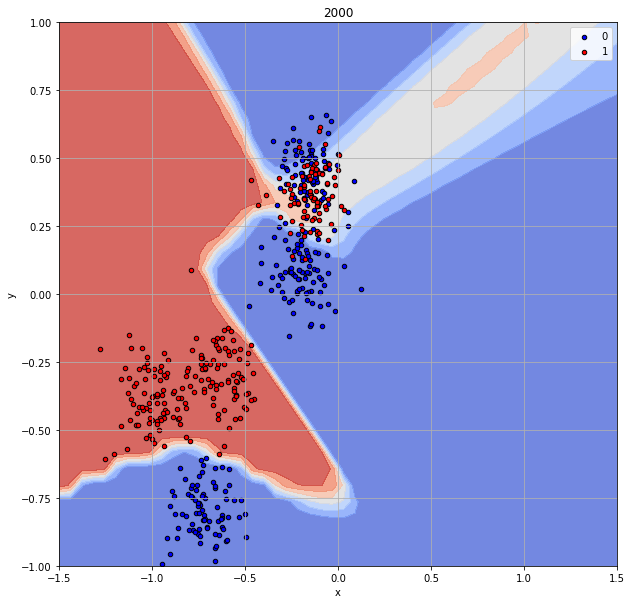

Epoch 2002/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0449 - val_accuracy: 0.8900
Epoch 2003/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8800 - val_loss: 0.0454 - val_accuracy: 0.9200
Epoch 2004/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8825 - val_loss: 0.0452 - val_accuracy: 0.8900
Epoch 2005/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0451 - val_accuracy: 0.8900
Epoch 2006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8750 - val_loss: 0.0457 - val_accuracy: 0.9000
Epoch 2007/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0450 - val_accuracy: 0.9100
Epoch 2008/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8750 - val_loss: 0.0454 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0459 - val_accuracy: 0.8800
Epoch 2059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.8750 - val_loss: 0.0462 - val_accuracy: 0.8900
Epoch 2060/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.8700 - val_loss: 0.0452 - val_accuracy: 0.8900
Epoch 2061/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.8725 - val_loss: 0.0457 - val_accuracy: 0.8900
Epoch 2062/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0457 - val_accuracy: 0.8900
Epoch 2063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0445 - val_accuracy: 0.8800
Epoch 2064/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8650 - val_loss: 0.0449 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0450 - val_accuracy: 0.8900
Epoch 2115/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8750 - val_loss: 0.0454 - val_accuracy: 0.8900
Epoch 2116/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8775 - val_loss: 0.0454 - val_accuracy: 0.8800
Epoch 2117/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0456 - val_accuracy: 0.8900
Epoch 2118/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8775 - val_loss: 0.0462 - val_accuracy: 0.8900
Epoch 2119/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8775 - val_loss: 0.0457 - val_accuracy: 0.8800
Epoch 2120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8750 - val_loss: 0.0460 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8725 - val_loss: 0.0461 - val_accuracy: 0.8900
Epoch 2171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0454 - val_accuracy: 0.8900
Epoch 2172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8775 - val_loss: 0.0459 - val_accuracy: 0.9100
Epoch 2173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.8650 - val_loss: 0.0457 - val_accuracy: 0.8800
Epoch 2174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.8700 - val_loss: 0.0463 - val_accuracy: 0.9200
Epoch 2175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8675 - val_loss: 0.0458 - val_accuracy: 0.8700
Epoch 2176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8650 - val_loss: 0.0455 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8675 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 2227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8725 - val_loss: 0.0459 - val_accuracy: 0.8800
Epoch 2228/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8750 - val_loss: 0.0462 - val_accuracy: 0.8800
Epoch 2229/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8675 - val_loss: 0.0462 - val_accuracy: 0.8800
Epoch 2230/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8775 - val_loss: 0.0458 - val_accuracy: 0.8900
Epoch 2231/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8775 - val_loss: 0.0460 - val_accuracy: 0.8900
Epoch 2232/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8675 - val_loss: 0.0458 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.8725 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 2283/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8675 - val_loss: 0.0466 - val_accuracy: 0.8700
Epoch 2284/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.8675 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 2285/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0461 - val_accuracy: 0.8800
Epoch 2286/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.8750 - val_loss: 0.0462 - val_accuracy: 0.8800
Epoch 2287/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.8725 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 2288/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.8675 - val_loss: 0.0459 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0460 - val_accuracy: 0.8900
Epoch 2339/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8850 - val_loss: 0.0465 - val_accuracy: 0.9100
Epoch 2340/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8650 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 2341/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8650 - val_loss: 0.0459 - val_accuracy: 0.8800
Epoch 2342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8775 - val_loss: 0.0466 - val_accuracy: 0.8800
Epoch 2343/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8750 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 2344/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0464 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 2395/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8625 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 2396/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0468 - val_accuracy: 0.8800
Epoch 2397/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8750 - val_loss: 0.0465 - val_accuracy: 0.8700
Epoch 2398/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0468 - val_accuracy: 0.8700
Epoch 2399/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8675 - val_loss: 0.0463 - val_accuracy: 0.8700
Epoch 2400/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8725 - val_loss: 0.0468 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.8775 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 2451/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8725 - val_loss: 0.0475 - val_accuracy: 0.8800
Epoch 2452/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.8775 - val_loss: 0.0470 - val_accuracy: 0.8600
Epoch 2453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0471 - val_accuracy: 0.8800
Epoch 2454/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8750 - val_loss: 0.0473 - val_accuracy: 0.9000
Epoch 2455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8775 - val_loss: 0.0472 - val_accuracy: 0.8800
Epoch 2456/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8725 - val_loss: 0.0470 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8675 - val_loss: 0.0468 - val_accuracy: 0.8800
Epoch 2507/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8775 - val_loss: 0.0473 - val_accuracy: 0.9000
Epoch 2508/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8825 - val_loss: 0.0469 - val_accuracy: 0.8800
Epoch 2509/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 2510/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.8650 - val_loss: 0.0471 - val_accuracy: 0.8700
Epoch 2511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.8750 - val_loss: 0.0470 - val_accuracy: 0.8600
Epoch 2512/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8700 - val_loss: 0.0473 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8800 - val_loss: 0.0470 - val_accuracy: 0.8800
Epoch 2563/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8750 - val_loss: 0.0473 - val_accuracy: 0.8800
Epoch 2564/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8725 - val_loss: 0.0474 - val_accuracy: 0.8600
Epoch 2565/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.8675 - val_loss: 0.0468 - val_accuracy: 0.8800
Epoch 2566/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0471 - val_accuracy: 0.8800
Epoch 2567/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0474 - val_accuracy: 0.8800
Epoch 2568/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0475 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0476 - val_accuracy: 0.8800
Epoch 2619/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0477 - val_accuracy: 0.8600
Epoch 2620/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0476 - val_accuracy: 0.8800
Epoch 2621/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8675 - val_loss: 0.0476 - val_accuracy: 0.8800
Epoch 2622/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.8650 - val_loss: 0.0469 - val_accuracy: 0.8800
Epoch 2623/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8725 - val_loss: 0.0478 - val_accuracy: 0.8800
Epoch 2624/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8675 - val_loss: 0.0474 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0475 - val_accuracy: 0.8800
Epoch 2675/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8750 - val_loss: 0.0475 - val_accuracy: 0.8600
Epoch 2676/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8650 - val_loss: 0.0478 - val_accuracy: 0.8800
Epoch 2677/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0479 - val_accuracy: 0.8800
Epoch 2678/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8725 - val_loss: 0.0481 - val_accuracy: 0.8800
Epoch 2679/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0475 - val_accuracy: 0.8600
Epoch 2680/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0474 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8625 - val_loss: 0.0481 - val_accuracy: 0.8800
Epoch 2731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0481 - val_accuracy: 0.8800
Epoch 2732/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8700 - val_loss: 0.0479 - val_accuracy: 0.8800
Epoch 2733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8725 - val_loss: 0.0478 - val_accuracy: 0.8700
Epoch 2734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0477 - val_accuracy: 0.8700
Epoch 2735/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8750 - val_loss: 0.0477 - val_accuracy: 0.8700
Epoch 2736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0481 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 2787/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0485 - val_accuracy: 0.8800
Epoch 2788/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8725 - val_loss: 0.0481 - val_accuracy: 0.8800
Epoch 2789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0479 - val_accuracy: 0.8600
Epoch 2790/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8700 - val_loss: 0.0479 - val_accuracy: 0.8800
Epoch 2791/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0480 - val_accuracy: 0.8900
Epoch 2792/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0484 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0483 - val_accuracy: 0.8800
Epoch 2843/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8775 - val_loss: 0.0483 - val_accuracy: 0.8800
Epoch 2844/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0487 - val_accuracy: 0.8800
Epoch 2845/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.8725 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 2846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8650 - val_loss: 0.0482 - val_accuracy: 0.8800
Epoch 2847/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8800 - val_loss: 0.0484 - val_accuracy: 0.8800
Epoch 2848/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8725 - val_loss: 0.0484 - val_accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.8775 - val_loss: 0.0488 - val_accuracy: 0.8800
Epoch 2899/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0344 - accuracy: 0.8775 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 2900/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8775 - val_loss: 0.0487 - val_accuracy: 0.8800
Epoch 2901/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0484 - val_accuracy: 0.8800
Epoch 2902/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8675 - val_loss: 0.0488 - val_accuracy: 0.8800
Epoch 2903/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 0.8750 - val_loss: 0.0485 - val_accuracy: 0.8600
Epoch 2904/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0485 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8700 - val_loss: 0.0489 - val_accuracy: 0.8600
Epoch 2955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0487 - val_accuracy: 0.8700
Epoch 2956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.8800 - val_loss: 0.0489 - val_accuracy: 0.8800
Epoch 2957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0489 - val_accuracy: 0.8600
Epoch 2958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.8725 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 2959/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0491 - val_accuracy: 0.8600
Epoch 2960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.8725 - val_loss: 0.0486 - val_accuracy: 0.

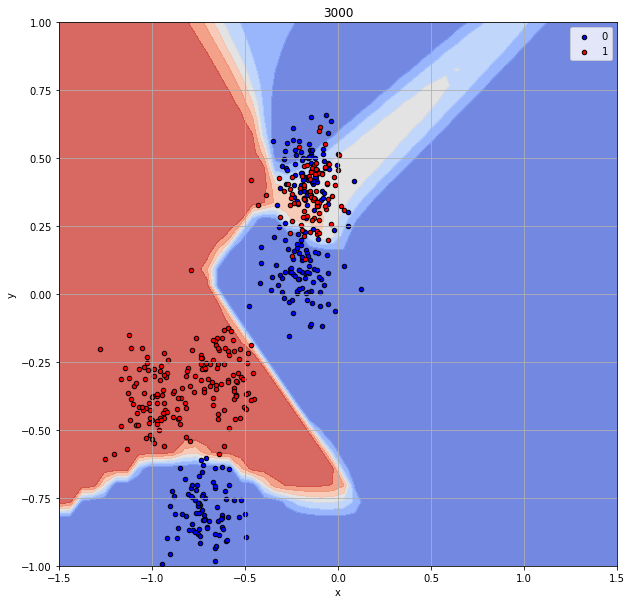

Epoch 3002/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8675 - val_loss: 0.0490 - val_accuracy: 0.8700
Epoch 3003/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0492 - val_accuracy: 0.8600
Epoch 3004/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0486 - val_accuracy: 0.8800
Epoch 3005/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8675 - val_loss: 0.0489 - val_accuracy: 0.8800
Epoch 3006/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8700 - val_loss: 0.0494 - val_accuracy: 0.8600
Epoch 3007/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8775 - val_loss: 0.0495 - val_accuracy: 0.8600
Epoch 3008/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.8725 - val_loss: 0.0496 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0484 - val_accuracy: 0.8600
Epoch 3059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0485 - val_accuracy: 0.8600
Epoch 3060/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.8750 - val_loss: 0.0486 - val_accuracy: 0.8800
Epoch 3061/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0485 - val_accuracy: 0.8800
Epoch 3062/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8725 - val_loss: 0.0489 - val_accuracy: 0.8800
Epoch 3063/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0488 - val_accuracy: 0.8800
Epoch 3064/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.8650 - val_loss: 0.0489 - val_accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0493 - val_accuracy: 0.8600
Epoch 3115/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0344 - accuracy: 0.8675 - val_loss: 0.0491 - val_accuracy: 0.8800
Epoch 3116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8675 - val_loss: 0.0493 - val_accuracy: 0.8800
Epoch 3117/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8700 - val_loss: 0.0494 - val_accuracy: 0.8700
Epoch 3118/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8775 - val_loss: 0.0494 - val_accuracy: 0.8600
Epoch 3119/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8775 - val_loss: 0.0493 - val_accuracy: 0.8600
Epoch 3120/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8725 - val_loss: 0.0489 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.8725 - val_loss: 0.0493 - val_accuracy: 0.8800
Epoch 3171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.8725 - val_loss: 0.0492 - val_accuracy: 0.8600
Epoch 3172/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8750 - val_loss: 0.0497 - val_accuracy: 0.8600
Epoch 3173/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8775 - val_loss: 0.0492 - val_accuracy: 0.8800
Epoch 3174/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0492 - val_accuracy: 0.8800
Epoch 3175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.8675 - val_loss: 0.0494 - val_accuracy: 0.8800
Epoch 3176/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0498 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0498 - val_accuracy: 0.8700
Epoch 3227/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0495 - val_accuracy: 0.8700
Epoch 3228/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0491 - val_accuracy: 0.8800
Epoch 3229/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0492 - val_accuracy: 0.8800
Epoch 3230/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.8775 - val_loss: 0.0496 - val_accuracy: 0.8600
Epoch 3231/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.8675 - val_loss: 0.0496 - val_accuracy: 0.8800
Epoch 3232/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0498 - val_accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.0344 - accuracy: 0.8775 - val_loss: 0.0500 - val_accuracy: 0.8600
Epoch 3283/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0498 - val_accuracy: 0.8800
Epoch 3284/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.8800 - val_loss: 0.0498 - val_accuracy: 0.8800
Epoch 3285/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0501 - val_accuracy: 0.8600
Epoch 3286/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0497 - val_accuracy: 0.8600
Epoch 3287/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0495 - val_accuracy: 0.8600
Epoch 3288/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0497 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8700 - val_loss: 0.0504 - val_accuracy: 0.8600
Epoch 3339/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0499 - val_accuracy: 0.8800
Epoch 3340/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0499 - val_accuracy: 0.8800
Epoch 3341/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0499 - val_accuracy: 0.8600
Epoch 3342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8775 - val_loss: 0.0497 - val_accuracy: 0.8600
Epoch 3343/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0500 - val_accuracy: 0.8600
Epoch 3344/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0501 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0499 - val_accuracy: 0.8700
Epoch 3395/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0500 - val_accuracy: 0.8600
Epoch 3396/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0499 - val_accuracy: 0.8600
Epoch 3397/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0501 - val_accuracy: 0.8600
Epoch 3398/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.8800 - val_loss: 0.0499 - val_accuracy: 0.8600
Epoch 3399/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0494 - val_accuracy: 0.8800
Epoch 3400/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0505 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 3451/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0504 - val_accuracy: 0.8600
Epoch 3452/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0498 - val_accuracy: 0.8600
Epoch 3453/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.8750 - val_loss: 0.0503 - val_accuracy: 0.8500
Epoch 3454/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0499 - val_accuracy: 0.8600
Epoch 3455/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0503 - val_accuracy: 0.8600
Epoch 3456/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8775 - val_loss: 0.0504 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8700 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 3507/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8700 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 3508/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 3509/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0501 - val_accuracy: 0.8700
Epoch 3510/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.8700 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 3511/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0505 - val_accuracy: 0.8600
Epoch 3512/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8725 - val_loss: 0.0506 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.8725 - val_loss: 0.0512 - val_accuracy: 0.8500
Epoch 3563/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8675 - val_loss: 0.0502 - val_accuracy: 0.8600
Epoch 3564/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8750 - val_loss: 0.0503 - val_accuracy: 0.8700
Epoch 3565/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 3566/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8725 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 3567/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 3568/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0509 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0506 - val_accuracy: 0.8800
Epoch 3619/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.8700 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 3620/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0513 - val_accuracy: 0.8500
Epoch 3621/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 3622/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8700 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 3623/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0505 - val_accuracy: 0.8600
Epoch 3624/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.8800 - val_loss: 0.0504 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8725 - val_loss: 0.0512 - val_accuracy: 0.8500
Epoch 3675/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8825 - val_loss: 0.0504 - val_accuracy: 0.8600
Epoch 3676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 3677/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 3678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8725 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 3679/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 3680/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8725 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 3731/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 3732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 3733/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.8725 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 3734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 3735/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.8725 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 3736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8800 - val_loss: 0.0508 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 3787/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.8725 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 3788/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.8725 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 3789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 3790/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.8700 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 3791/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 3792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0514 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 3843/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 3844/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 3845/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 3846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 3847/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 3848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8750 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 3899/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0521 - val_accuracy: 0.8600
Epoch 3900/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 3901/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8750 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 3902/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.8700 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 3903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8750 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 3904/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 3955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8825 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 3956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 3957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 3958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 3959/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 3960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0514 - val_accuracy: 0.

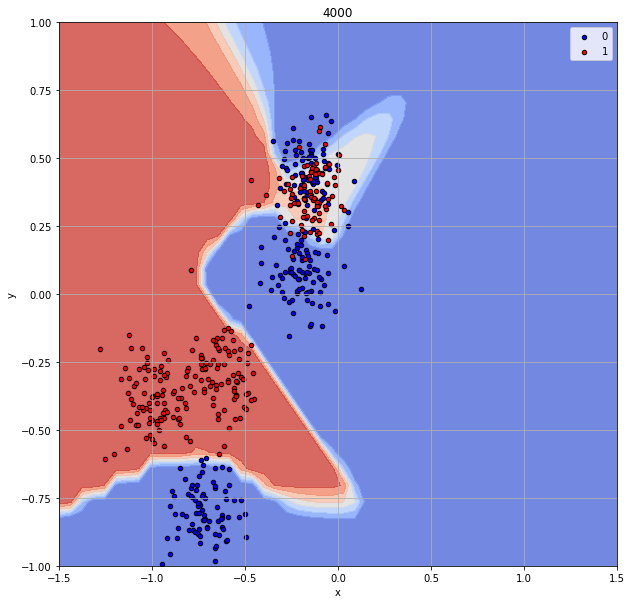

Epoch 4002/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8750 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 4003/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 4004/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4005/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8750 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 4006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4007/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4008/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0516 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 4060/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8750 - val_loss: 0.0515 - val_accuracy: 0.8500
Epoch 4061/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 4062/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8775 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4064/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0518 - val_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0525 - val_accuracy: 0.8500
Epoch 4115/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4116/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4117/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4118/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8775 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 4119/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0523 - val_accuracy: 0.8500
Epoch 4120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8750 - val_loss: 0.0520 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 4171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 4172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 4173/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0520 - val_accuracy: 0.8600
Epoch 4174/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0524 - val_accuracy: 0.8500
Epoch 4175/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8725 - val_loss: 0.0516 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 4227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8775 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 4228/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4229/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8775 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4230/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8750 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4231/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 4232/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8725 - val_loss: 0.0522 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.8800 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4283/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8850 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 4284/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 4285/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 4286/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4287/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8750 - val_loss: 0.0515 - val_accuracy: 0.8500
Epoch 4288/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8725 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4339/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.8700 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 4340/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8800 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4341/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.8800 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 4343/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.8775 - val_loss: 0.0524 - val_accuracy: 0.8500
Epoch 4344/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8775 - val_loss: 0.0521 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8775 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4395/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.8850 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4396/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0515 - val_accuracy: 0.8500
Epoch 4397/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.8800 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 4398/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.8775 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4399/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4400/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8725 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4451/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4452/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8725 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4453/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8725 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 4454/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0521 - val_accuracy: 0.8500
Epoch 4455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4456/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.8725 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 4507/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.8600 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4508/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0521 - val_accuracy: 0.8500
Epoch 4509/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0521 - val_accuracy: 0.8500
Epoch 4510/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.8725 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 4511/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8775 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 4512/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0516 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8500
Epoch 4563/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 4564/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8775 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4565/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8725 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 4566/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0515 - val_accuracy: 0.8500
Epoch 4567/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 4568/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.8750 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8725 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4619/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8700 - val_loss: 0.0512 - val_accuracy: 0.8500
Epoch 4620/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 4621/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0513 - val_accuracy: 0.8500
Epoch 4622/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0514 - val_accuracy: 0.8500
Epoch 4623/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8725 - val_loss: 0.0512 - val_accuracy: 0.8500
Epoch 4624/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8725 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8825 - val_loss: 0.0521 - val_accuracy: 0.8500
Epoch 4675/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8825 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 4676/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8775 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 4677/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 4678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0523 - val_accuracy: 0.8500
Epoch 4679/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8825 - val_loss: 0.0521 - val_accuracy: 0.8500
Epoch 4680/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8750 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 4731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 4733/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8825 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 4734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4735/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8775 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 4736/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8775 - val_loss: 0.0530 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4787/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 4788/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8750 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 4789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4790/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4791/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8825 - val_loss: 0.0537 - val_accuracy: 0.8500
Epoch 4792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 4843/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8775 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 4844/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8775 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 4845/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.8800 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 4846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4847/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 4848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8775 - val_loss: 0.0539 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8775 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 4899/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8750 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 4900/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4901/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 4902/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.8800 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 4903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8725 - val_loss: 0.0537 - val_accuracy: 0.8500
Epoch 4904/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.8750 - val_loss: 0.0537 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 4955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 4956/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 4957/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 4958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 4959/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 4960/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0528 - val_accuracy: 0

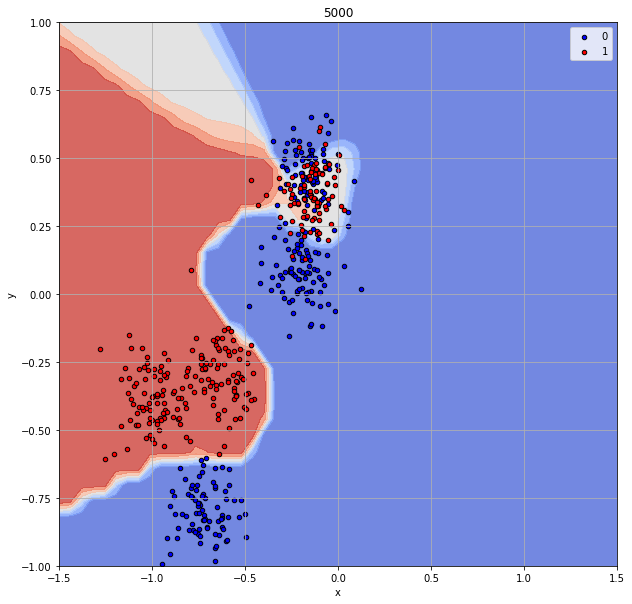

Epoch 5002/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5003/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5004/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5005/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5007/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5008/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0532 -

13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0538 - val_accuracy: 0.8500
Epoch 5060/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5061/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5062/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5064/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8825 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5117/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5118/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8775 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5119/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8750 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5172/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5173/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5175/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0537 - val_accuracy: 0.8500
Epoch 5227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0540 - val_accuracy: 0.8500
Epoch 5228/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0538 - val_accuracy: 0.8500
Epoch 5229/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0539 - val_accuracy: 0.8500
Epoch 5230/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5231/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8775 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5232/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0542 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8775 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5283/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5284/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5285/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0538 - val_accuracy: 0.8500
Epoch 5286/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8775 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5287/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8750 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5288/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5339/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0537 - val_accuracy: 0.8500
Epoch 5340/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5341/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5343/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5344/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0537 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5395/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5396/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5397/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0538 - val_accuracy: 0.8500
Epoch 5398/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8750 - val_loss: 0.0538 - val_accuracy: 0.8500
Epoch 5399/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5400/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0530 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5451/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8750 - val_loss: 0.0538 - val_accuracy: 0.8500
Epoch 5452/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8750 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5454/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5455/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5456/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0532 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8825 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5507/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5508/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5509/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5510/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5511/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5512/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8775 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 5563/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0536 - val_accuracy: 0.8500
Epoch 5564/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5565/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5566/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5567/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8800 - val_loss: 0.0537 - val_accuracy: 0.8500
Epoch 5568/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.8775 - val_loss: 0.0536 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5619/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5620/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5621/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0534 - val_accuracy: 0.8500
Epoch 5622/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5623/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 5624/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0529 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5675/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.8825 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5677/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8825 - val_loss: 0.0532 - val_accuracy: 0.8500
Epoch 5678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5679/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5680/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8750 - val_loss: 0.0533 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0533 - val_accuracy: 0.8500
Epoch 5731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5732/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5735/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5736/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8750 - val_loss: 0.0533 - val_accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5787/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8750 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5788/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5789/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0535 - val_accuracy: 0.8500
Epoch 5790/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8825 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5791/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5792/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0525 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5843/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 5844/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0527 - val_accuracy: 0.8500
Epoch 5845/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 5846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0531 - val_accuracy: 0.8500
Epoch 5847/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8750 - val_loss: 0.0530 - val_accuracy: 0.8500
Epoch 5848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0529 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0526 - val_accuracy: 0.8500
Epoch 5899/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5900/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0529 - val_accuracy: 0.8500
Epoch 5901/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5902/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8825 - val_loss: 0.0527 - val_accuracy: 0.8500
Epoch 5903/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 5904/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.8775 - val_loss: 0.0527 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8775 - val_loss: 0.0524 - val_accuracy: 0.8500
Epoch 5955/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 5956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0528 - val_accuracy: 0.8500
Epoch 5957/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0525 - val_accuracy: 0.8500
Epoch 5958/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0526 - val_accuracy: 0.8500
Epoch 5959/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0525 - val_accuracy: 0.8500
Epoch 5960/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0522 - val_accuracy: 0.

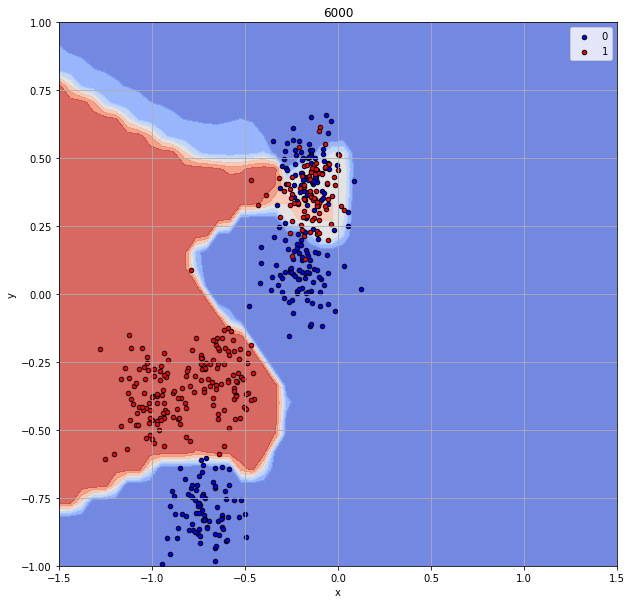

Epoch 6002/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 6003/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 6004/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 6005/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0520 - val_accuracy: 0.8500
Epoch 6006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 6007/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 6008/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0518 -

13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 6059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 6060/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 6061/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 6062/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 6063/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 6064/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8775 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 6115/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 6116/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8850 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6117/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 6118/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 6119/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6171/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 6176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6228/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6229/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8775 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6230/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 6231/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6232/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6283/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6284/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6285/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6286/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6287/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6288/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0507 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8775 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6339/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6340/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6341/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6343/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6344/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0328 - accuracy: 0.8850 - val_loss: 0.0512 - val_accuracy: 0.

Epoch 6394/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6395/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6396/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6397/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0504 - val_accuracy: 0.8600
Epoch 6398/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6399/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6400/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6451/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6452/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6454/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8800 - val_loss: 0.0504 - val_accuracy: 0.8700
Epoch 6456/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.8850 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6507/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.8775 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6508/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6509/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6510/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6512/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6563/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6564/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6565/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6566/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6567/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6568/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0507 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6619/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6620/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6621/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6622/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6623/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8825 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6624/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0507 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6675/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6677/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8800 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6679/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6680/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0507 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6734/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6735/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6787/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6788/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6790/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 6791/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8850 - val_loss: 0.0505 - val_accuracy: 0.8600
Epoch 6792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8850 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6843/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6844/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 6845/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8775 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6847/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6899/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6900/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6901/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 6902/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0505 - val_accuracy: 0.8700
Epoch 6903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 6904/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 6957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 6958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8800 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 6959/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 6960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.

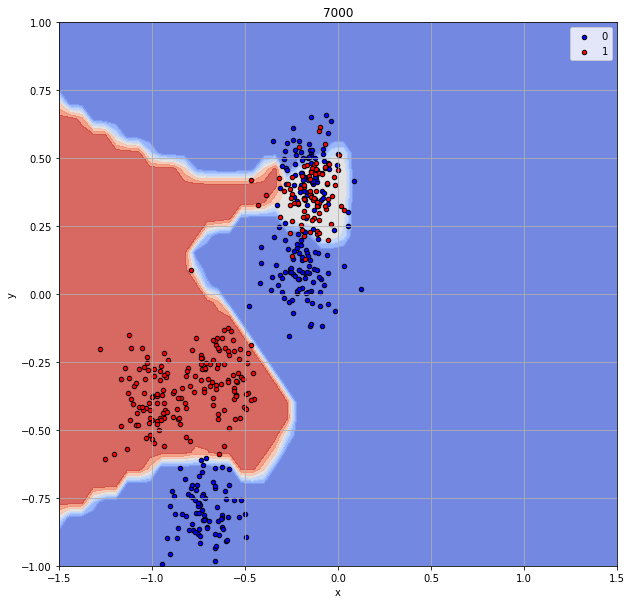

Epoch 7002/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7003/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7004/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7005/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 7007/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7008/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0511 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7059/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7060/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7061/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7062/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7064/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7116/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7117/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 7118/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7119/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8800 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7228/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7229/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7230/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7231/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7232/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7283/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 7284/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7285/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 7286/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7287/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7288/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7339/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7340/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 7341/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7342/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7343/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7344/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7395/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7396/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7397/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7398/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7399/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8800 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7400/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8800 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7451/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7452/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7453/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7454/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7455/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7456/10000
13/13 [==============================] - 0s 32ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0

13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7507/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7509/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7510/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7512/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7563/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7564/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7565/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7566/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7567/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7568/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 7619/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7620/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7621/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7622/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7623/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8700
Epoch 7624/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7675/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0595 - val_accuracy: 0.8400
Epoch 7676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.8650 - val_loss: 0.0551 - val_accuracy: 0.8500
Epoch 7677/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.8725 - val_loss: 0.0527 - val_accuracy: 0.8500
Epoch 7678/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.8700 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 7679/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7680/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.8700 - val_loss: 0.0510 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7731/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 7732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7734/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7735/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7736/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7787/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7788/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8850 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 7790/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 7791/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7843/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7844/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7845/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7846/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7847/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 7848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7899/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7900/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7901/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 7902/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 7903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8700
Epoch 7904/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 7958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 7959/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 7960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

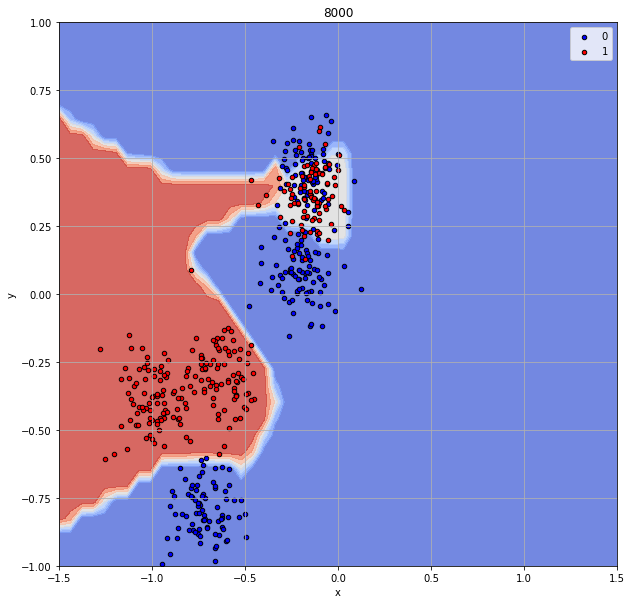

Epoch 8002/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8500
Epoch 8003/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 8004/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 8005/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8007/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8008/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0514 -

13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8059/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8060/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8061/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.8800 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8062/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.8775 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 8064/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.8800 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 8115/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0521 - val_accuracy: 0.8600
Epoch 8116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8117/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 8118/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0521 - val_accuracy: 0.8600
Epoch 8119/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 8120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0518 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8171/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 8172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 8173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0522 - val_accuracy: 0.8600
Epoch 8175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 8176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8227/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 8228/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8229/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8230/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8231/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8232/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 8283/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 8284/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8285/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8286/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8287/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8288/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8339/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8340/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8341/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8342/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8343/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8344/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 8395/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8396/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8397/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8398/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8399/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 8400/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0518 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8451/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8452/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8454/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8456/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 8507/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8508/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8509/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8510/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8512/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0

13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8563/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8564/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8565/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 8566/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8567/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8568/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8619/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8620/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8621/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8622/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8623/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8624/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0511 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8675/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 8676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 8677/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8678/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8679/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8680/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 8731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 8734/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8735/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8787/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8788/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0519 - val_accuracy: 0.8500
Epoch 8789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8790/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0511 - val_accuracy: 0.8600
Epoch 8791/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 8792/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8843/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8844/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8845/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8846/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 8847/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 8848/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8899/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 8900/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8901/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8902/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8903/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8904/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 8955/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8957/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8958/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8875 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 8959/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 8960/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.

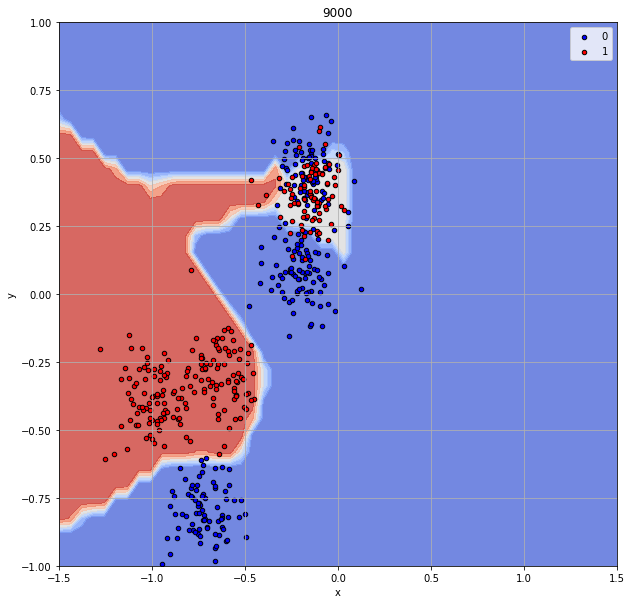

Epoch 9002/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 9003/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9004/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9005/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9006/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9007/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 9008/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0516 -

13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8875 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9059/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9060/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9061/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 9062/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8875 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9063/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9064/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8875 - val_loss: 0.0518 - val_accuracy: 0.8500
Epoch 9115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9117/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 9118/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 9119/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9120/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9171/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9172/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9173/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.

13/13 [==============================] - 0s 7ms/step - loss: 0.0322 - accuracy: 0.8875 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 9227/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.8875 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9228/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.8850 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 9229/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 9230/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8850 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 9231/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0320 - accuracy: 0.8875 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9232/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9283/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 9284/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 9285/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.8875 - val_loss: 0.0517 - val_accuracy: 0.8500
Epoch 9286/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0321 - accuracy: 0.8850 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 9287/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 9288/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.8825 - val_loss: 0.0514 - val_accuracy: 0.

In [ ]:
history01 = model.fit(features, labels, epochs=10000, validation_split=0.2, verbose=1, callbacks=[CustomCallBack()] )

In [ ]:
pd.DataFrame(history01.history)